# 2$\pi$k:  Personal Loan

### Наша задача состояла в оптимизации коэфициента конверсии потребительского кредита.

In [3]:
import pandas as pd, numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [4]:
data = pd.read_csv('BPL.csv')
data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


## Описание колонок
* **ID** : ID пользователя

* **Age** : Число полных лет пользователя

* **Experience** : Стаж работы

* **Income** : Средний месячный доход в тысячах долларов

* **ZIP Code** : Почтовый индекс

* **Family** : Размер семьи

* **CCAvg** : Средняя трата по кредитной карте за месяц

* **Education** : Степень образования.
   0. Среднее  
   1. Высшее  
   2. Доктор наук  
   

* **Mortgage** : Стоимость ипотеки при наличии. (в тысячах долларов)

* **Personal Loan** : Принял ли клиент предожение в прошлогодней кампании

* **Securities Account** : Есть ли у клиента счет в банке с ценными бумагами(брокерский счет)

* **CD Account** : Есть ли у клиента банковский вклад

* **Online** : Пользуется ли клиент услугами интернет - банкинга?

* **Credit card** : Использует ли клиент кредитную карту, выпущенную банком

### Проведем первичный анализ данных

In [5]:
data.drop(['ID'],axis=1,inplace=True)

In [6]:
data.shape

(5000, 13)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Experience          5000 non-null   int64  
 2   Income              5000 non-null   int64  
 3   ZIP Code            5000 non-null   int64  
 4   Family              5000 non-null   int64  
 5   CCAvg               5000 non-null   float64
 6   Education           5000 non-null   int64  
 7   Mortgage            5000 non-null   int64  
 8   Personal Loan       5000 non-null   int64  
 9   Securities Account  5000 non-null   int64  
 10  CD Account          5000 non-null   int64  
 11  Online              5000 non-null   int64  
 12  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(12)
memory usage: 507.9 KB


In [8]:
data.describe()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [9]:
data['Personal Loan'].value_counts()

0    4520
1     480
Name: Personal Loan, dtype: int64

Мы имеем дело с бинарной классификацией по сильно несбалансированной выборке(9:1)  
Рассмотрим корреляцию признаков

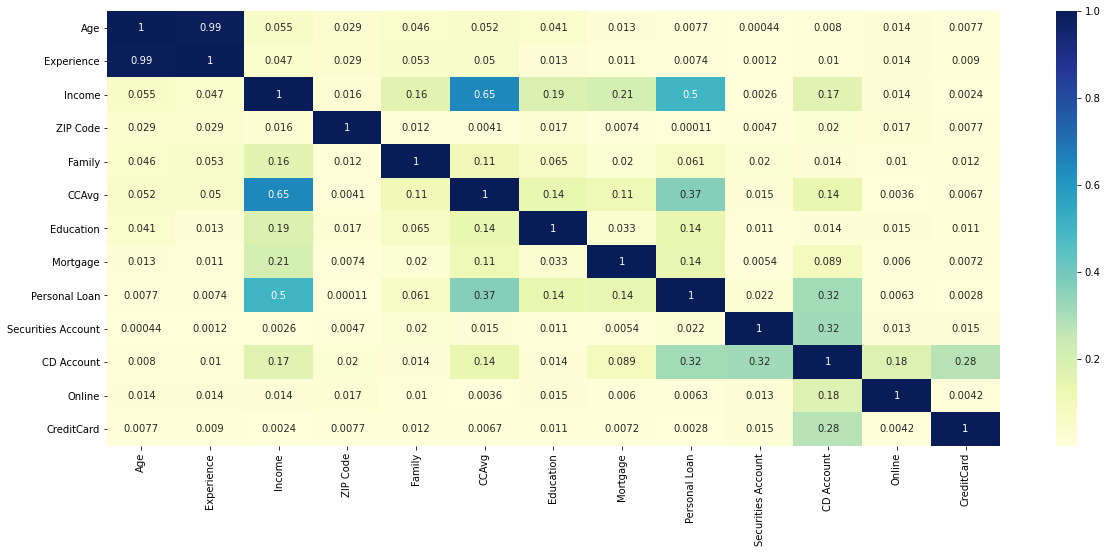

In [10]:
plt.figure(figsize=(20,8))
sns.heatmap(abs(data.corr()), annot=True, fmt='.2g',cmap='YlGnBu')
plt.show()

Есть линейная зависимость между **Age** и **Experince**

In [11]:
data.drop(['Experience'],axis=1,inplace=True)

In [12]:
num_cols = ['Age', 'Income', 'CCAvg', 'Mortgage', 'Family', 'Education']

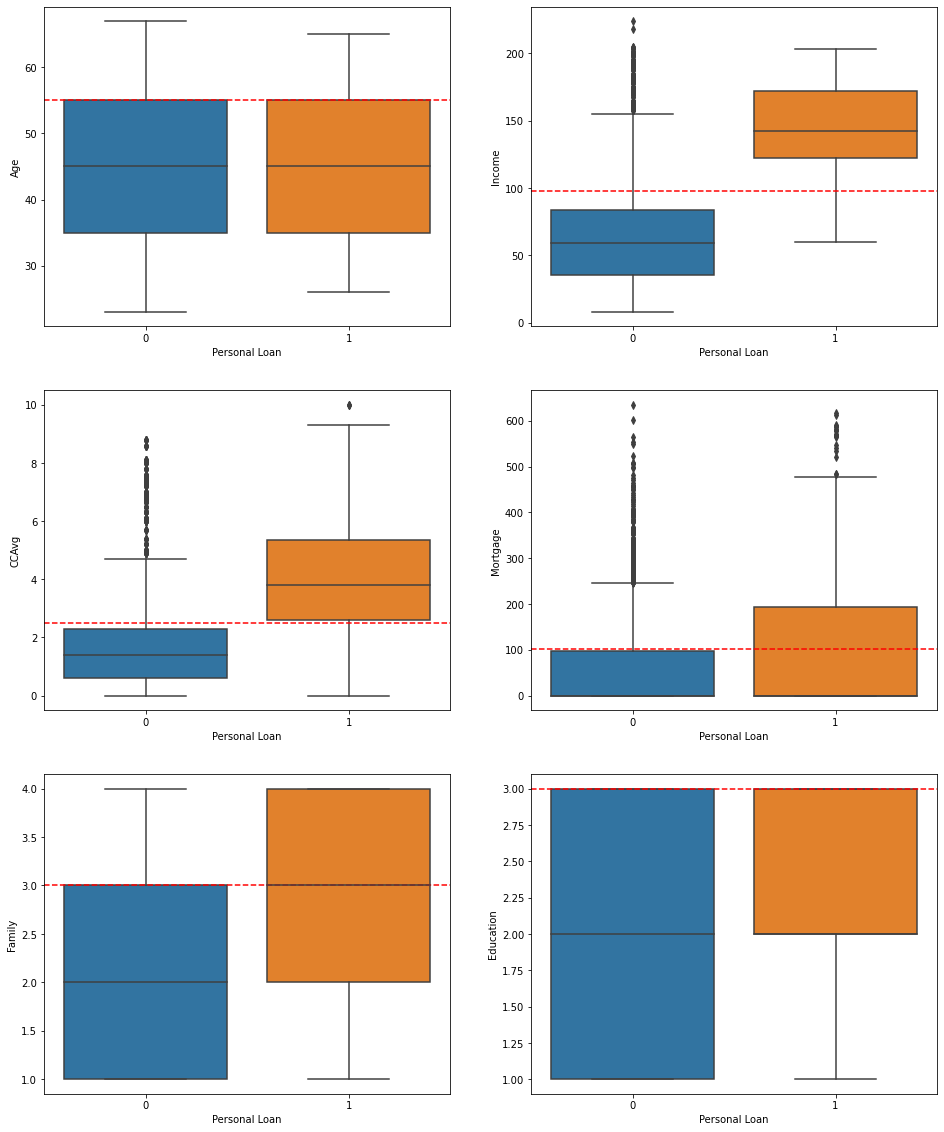

In [13]:
ig, ax = plt.subplots(3, 2, figsize=(16, 20))

for current_column, axis in zip(num_cols, ax.flatten()):
    sns.boxplot(x='Personal Loan', y=current_column, data=data, ax=axis)
    axis.axhline(data.describe().loc['75%', current_column], ls='--', c='red')

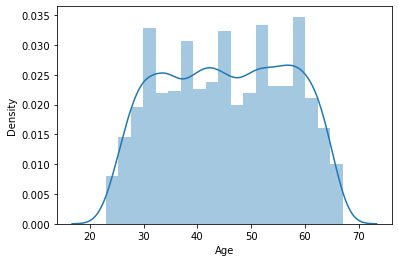

In [14]:
sns.distplot(data['Age'])
plt.show()

In [15]:
data['Age_Grp'] = [0 if i <35 else 1 if i<50 and i>=35 else 2 for i in data.Age]

In [16]:
data

,Age,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Age_Grp
0,25,49,91107,4,1.6,1,0,0,1,0,0,0,0
1,45,34,90089,3,1.5,1,0,0,1,0,0,0,1
2,39,11,94720,1,1.0,1,0,0,0,0,0,0,1
3,35,100,94112,1,2.7,2,0,0,0,0,0,0,1
4,35,45,91330,4,1.0,2,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,40,92697,1,1.9,3,0,0,0,0,1,0,0
4996,30,15,92037,4,0.4,1,85,0,0,0,1,0,0
4997,63,24,93023,2,0.3,3,0,0,0,0,0,0,2
4998,65,49,90034,3,0.5,2,0,0,0,0,1,0,2


In [17]:
X = data.drop('Personal Loan',axis=1)
y = data['Personal Loan']

In [18]:
from sklearn.model_selection import train_test_split

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=13)


In [52]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import StratifiedKFold
from tqdm import tqdm

In [53]:
lr_params = {'C':np.linspace(0.01,2,15),
             'penalty':['l1','l2']}
        
knn_params = {'n_neighbors':np.arange(1,50)}

rf_params =  {'max_features':[1,3,10],
              'min_samples_split':[2,3,10],
              'min_samples_leaf':[1,3,10],
              'bootstrap':[False, True],
              'n_estimators':[100,300],
              'criterion':['gini']}

gb_params = {'learning_rate':[0.001,0.01,0.1,0.05],
            'n_estimators':[100,500,1000],
            'max_depth':[3,5,10],
            'min_samples_split':[2,5,10]}


In [54]:
classifier = [RandomForestClassifier(), LogisticRegression(), KNeighborsClassifier(), GradientBoostingClassifier()]
ml_list = ['Random Forest','Logistic Regression','KNN','GradientBoosting']
param = [rf_params,lr_params,knn_params,gb_params]

In [55]:
from sklearn.metrics import plot_precision_recall_curve

def model_train(X_train,y_train, classifiers, classifiers_name, params,
                scoring='roc_auc', n_jobs= -1, verbose = 1, n_splits=5):
    best_score = []
    best_estimator = []
    for i in range(len(classifiers)):
        clf = GridSearchCV(classifier[i],
                                param_grid=[param[i]],
                                cv = StratifiedKFold(n_splits=n_splits),
                                scoring = scoring,
                                n_jobs= n_jobs,
                                verbose = verbose)
        clf.fit(X_train,y_train)
        best_score.append(clf.best_score_)
        best_estimator.append((clf.best_estimator_))
        print(f'Method: {classifiers_name[i]}  Score: {best_score[i]} Best estimator: {clf.best_estimator_}')
    results = pd.DataFrame({'CV Means':best_score, 'ML Models':classifiers_name})
    vres = sns.barplot('CV Means','ML Models',data=results)
    vres.set_title(f'{scoring} Score')
    plt.show()
    return best_score, best_estimator
    
    
def draw_precsision_recall_curve(X_test,y_test, classifier, best_estimator):
    if len(classifier)>4:
        return "Error function support only 4 classifiers, rewrite function or decrease amout of classifiers"
    fig, axes = plt.subplots(2,2, figsize=(20,8))
    for i in range(len(classifier)):
        if (i>1):
            plot_precision_recall_curve(best_estimator[i], X_test, y_test, ax=axes[1][i%2])
        else:
            plot_precision_recall_curve(best_estimator[i], X_test, y_test, ax=axes[0][i])

## Оптимизируем метрику f1

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Method: Random Forest  Score: 0.9336924827335643 Best estimator: RandomForestClassifier(max_features=3, n_estimators=300)
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Method: Logistic Regression  Score: 0.485814448298244 Best estimator: LogisticRegression(C=2.0)
Fitting 5 folds for each of 49 candidates, totalling 245 fits
Method: KNN  Score: 0.35382565619014306 Best estimator: KNeighborsClassifier(n_neighbors=1)
Fitting 5 folds for each of 108 candidates, totalling 540 fits
Method: GradientBoosting  Score: 0.9382523646736105 Best estimator: GradientBoostingClassifier(learning_rate=0.05, min_samples_split=5,
                           n_estimators=1000)


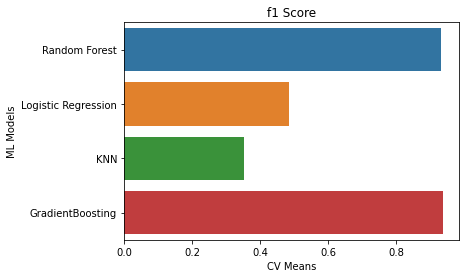

In [56]:
best_f1_score, best_f1_estimator = model_train(X_train=X_train, y_train=y_train, 
            classifiers=classifier, classifiers_name=ml_list, params=param, scoring='f1')


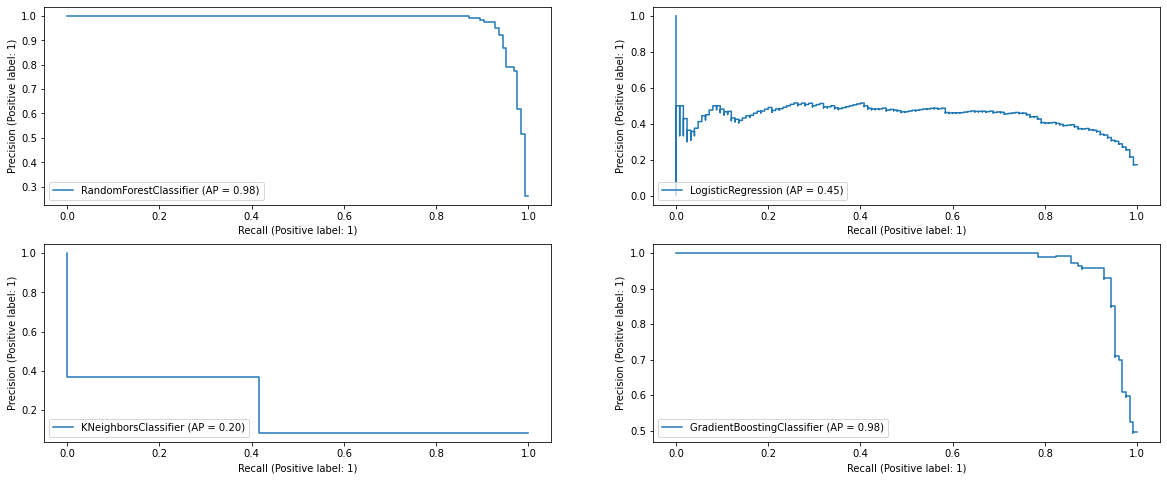

In [57]:
draw_precsision_recall_curve(X_test,y_test,classifier, best_f1_estimator)

## Оптимизируем метрику ROC_AUC

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Method: Random Forest  Score: 0.9980429476701225 Best estimator: RandomForestClassifier(max_features=10, n_estimators=300)
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Method: Logistic Regression  Score: 0.9290131888309187 Best estimator: LogisticRegression(C=2.0)
Fitting 5 folds for each of 49 candidates, totalling 245 fits
Method: KNN  Score: 0.8679751002037663 Best estimator: KNeighborsClassifier(n_neighbors=27)
Fitting 5 folds for each of 108 candidates, totalling 540 fits
Method: GradientBoosting  Score: 0.9981504288049441 Best estimator: GradientBoostingClassifier(learning_rate=0.05, n_estimators=500)


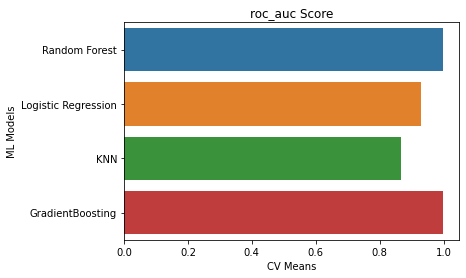

In [58]:
best_RA_score, best_RA_estimator = model_train(X_train=X_train, y_train=y_train, 
            classifiers=classifier, classifiers_name=ml_list, params=param, scoring='roc_auc')

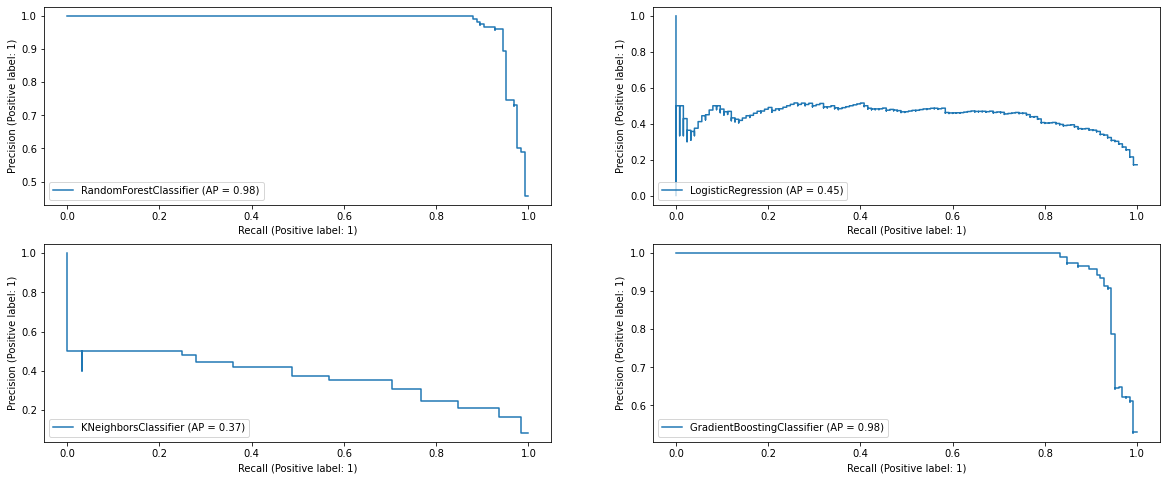

In [59]:
draw_precsision_recall_curve(X_test, y_test, classifier, best_RA_estimator)

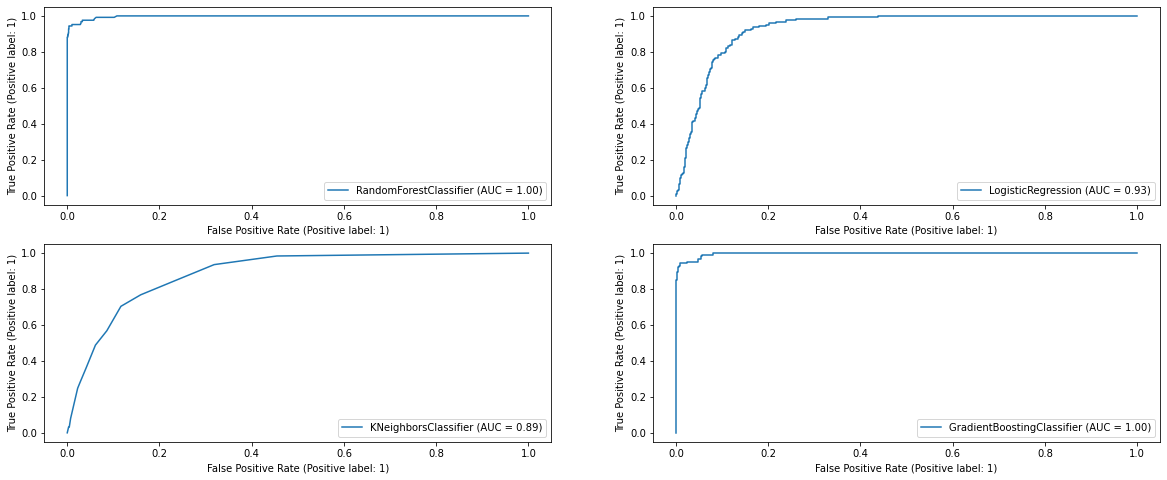

In [60]:
from sklearn.metrics import plot_roc_curve
fig, axes = plt.subplots(2,2, figsize=(20,8))
for i in range(len(classifier)):
    if (i>1):
        plot_roc_curve(best_RA_estimator[i], X_test, y_test, ax=axes[1][i%2])  
    else:
        plot_roc_curve(best_RA_estimator[i], X_test, y_test, ax=axes[0][i])  
plt.show()

### Сравним полученные модели 

In [61]:
from sklearn.metrics import roc_auc_score, f1_score, precision_score, recall_score
def calc_diff_metrics(X_test, y_test, models, name_models):
    name_metrics = ['f1','precion','recall','roc_auc']
    metrics = [f1_score, precision_score, recall_score, roc_auc_score]
    ans = pd.DataFrame(index=name_models,columns=name_metrics)
    for i in range(len(models)):
        for j in range(len(metrics)):
            try:
                ans.loc[name_models[i],name_metrics[j]]=metrics[i](y_test, models[i].predict_proba(X_test))
            except Exception:
                ans.loc[name_models[i],name_metrics[j]]=metrics[i](y_test, models[i].predict(X_test))
    return ans
        
    

In [62]:
# Для f1
calc_diff_metrics(X_test,y_test, best_f1_estimator, ml_list)

,f1,precion,recall,roc_auc
Random Forest,0.937759,0.937759,0.937759,0.937759
Logistic Regression,0.493827,0.493827,0.493827,0.493827
KNN,0.416,0.416,0.416,0.416
GradientBoosting,0.962182,0.962182,0.962182,0.962182


In [63]:
# Для ROC-AUC
calc_diff_metrics(X_test,y_test, best_RA_estimator, ml_list)

,f1,precion,recall,roc_auc
Random Forest,0.942623,0.942623,0.942623,0.942623
Logistic Regression,0.493827,0.493827,0.493827,0.493827
KNN,0.032,0.032,0.032,0.032
GradientBoosting,0.957455,0.957455,0.957455,0.957455


### Пробуем ансамбль

In [72]:
from sklearn.ensemble import VotingClassifier
voting_clf = VotingClassifier(estimators=[('rf',best_RA_estimator[0]),
                                        ('lr',best_RA_estimator[1]),
                                        ('gb',best_RA_estimator[-1])],
                                          voting='soft', n_jobs=-1)
voting_clf = voting_clf.fit(X_train,y_train)
total_score = roc_auc_score(y_test, voting_clf.predict(X_test)), f1_score(y_test, voting_clf.predict(X_test))
print(total_score)

(0.9389090909090908, 0.9243697478991596)
